In [54]:
import glob
import imageio
from pathlib import Path
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_files = sorted(glob.glob("frames/*.jpg"))

frames = []

for file in image_files:
    img = cv2.imread(file)  # Read image
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    frames.append(img_gray)  # Append to list

frames_array = np.array(frames)
frames_array.shape


(50, 240, 320)

In [55]:
import os
from ipywidgets import interact, IntSlider

def show_video(x,cmap=None):
    def f(i):
        plt.imshow(x[i],cmap='gray')
    interact(f, i=IntSlider(min=0, max=len(x)-1, step=1, value=0))

show_video(frames_array)

interactive(children=(IntSlider(value=0, description='i', max=49), Output()), _dom_classes=('widget-interact',…

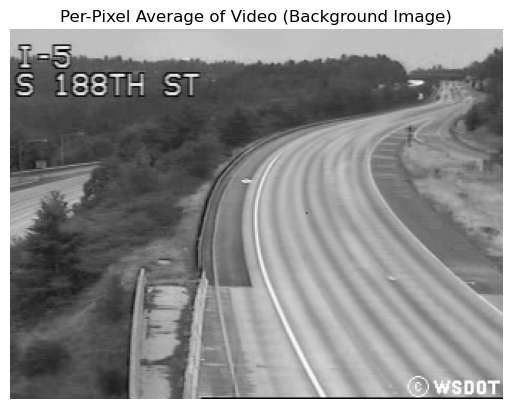

In [56]:
# axis = 0, average across frames
avg_frame = np.mean(frames_array, axis=0)
plt.imshow(avg_frame, cmap='gray')
plt.title("Per-Pixel Average of Video (Background Image)")
plt.axis('off')
plt.show()

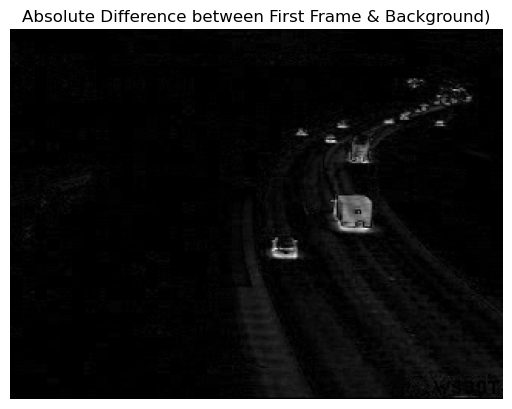

In [57]:
first_frame = frames_array[0]
abs_diff = np.abs(avg_frame - first_frame)
plt.imshow(abs_diff, cmap='gray')
plt.title("Absolute Difference between First Frame & Background)")
plt.axis('off')
plt.show()

(-0.5, 319.5, 239.5, -0.5)

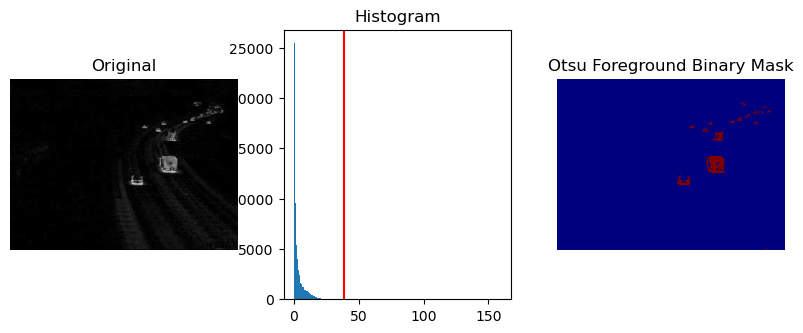

In [59]:
from skimage import data
from skimage.filters import threshold_otsu

abs_diff = np.abs(avg_frame - first_frame)

thresh = threshold_otsu(abs_diff)
binary = abs_diff > thresh

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(abs_diff, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

ax[1].hist(abs_diff.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Otsu result.
ax[2].imshow(binary, cmap='jet')
ax[2].set_title('Otsu Foreground Binary Mask')
ax[2].axis('off')

In [60]:
masked_frames = []

for file in image_files:
    img = cv2.imread(file)  # Read image
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    abs_diff = np.abs(avg_frame - img_gray)
    thresholds = threshold_multiotsu(abs_diff, classes=2)
    regions = np.digitize(abs_diff, bins=thresholds)

    masked_frames.append(regions)  # Append to list

masked_frames_array = np.array(masked_frames)
show_video(masked_frames_array)

interactive(children=(IntSlider(value=0, description='i', max=49), Output()), _dom_classes=('widget-interact',…

In [61]:
import skimage
import skimage.measure

masked_boxed_frames = []

for file in image_files:
    img = cv2.imread(file)  # Read image
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    abs_diff = np.abs(avg_frame - img_gray)

    thresh = threshold_otsu(abs_diff)
    binary = abs_diff > thresh

    binary_uint8 = (binary * 255).astype(np.uint8)
    binary_color = cv2.cvtColor(binary_uint8, cv2.COLOR_GRAY2BGR)
    
    labels = skimage.measure.label(binary)
    labeled_regions = skimage.measure.regionprops(labels)

    for props in labeled_regions:
        minr, minc, maxr, maxc = props.bbox
        cv2.rectangle(binary_color, (minc, minr), (maxc, maxr), (255, 0, 0), 2)

    masked_boxed_frames.append(binary_color)  # Append to list

masked_boxed_frames_array = np.array(masked_boxed_frames)
show_video(masked_boxed_frames_array)

interactive(children=(IntSlider(value=0, description='i', max=49), Output()), _dom_classes=('widget-interact',…